# *(Niebur, et. al, 2009)* Generalized integrate-and-fire model

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/brainpy/examples/blob/main/neurons/Niebur_2009_GIF.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/brainpy/examples/blob/main/neurons/Niebur_2009_GIF.ipynb)

Implementation of the paper: *Mihalaş, Ştefan, and Ernst Niebur. "A generalized linear integrate-and-fire neural model produces diverse spiking behaviors." Neural computation 21.3 (2009): 704-718.*

In [1]:
import matplotlib.pyplot as plt
import brainpy as bp

## Model Overview

Generalized integrate-and-fire model is a spiking neuron model, describes single neuron behavior and can generate most kinds of firing patterns by tuning parameters.

Generalized IF model is originated from Leaky Integrate-and-Fire model (LIF model), yet it's differentiated from LIF model, for it includes internal currents $I_j$ in its expressions.

$$\frac{d I_j}{d t} = -k_j I_j$$

$$\tau\frac{d V}{d t} = - (V - V_{rest}) + R\sum_{j}I_j + RI$$

$$\frac{d V_{th}}{d t} = a(V - V_{rest}) - b(V_{th} - V_{th\infty})$$


Generalized IF neuron fire when $V$ meet $V_{th}$:

$$I_j \leftarrow R_j I_j + A_j$$

$$V \leftarrow V_{reset}$$

$$V_{th} \leftarrow max(V_{th_{reset}}, V_{th}) $$

## Different firing patterns

These arbitrary number of internal currents $I_j$ can be seen as currents caused by ion channels' dynamics, provides the GeneralizedIF model a flexibility to generate various firing patterns.

With appropriate parameters, we can reproduce most of the single neuron firing patterns. In the original paper (Mihalaş et al., 2009), the author used two internal currents $I1$ and $I2$.

In [2]:
def run(model, duration, I_ext):
  runner = bp.DSRunner(model,
                       inputs=('input', I_ext, 'iter'),
                       monitors=['V', 'V_th'])
  runner.run(duration)

  ts = runner.mon.ts
  fig, gs = bp.visualize.get_figure(1, 1, 4, 8)
  ax1 = fig.add_subplot(gs[0, 0])
  #ax1.title.set_text(f'{mode}')

  ax1.plot(ts, runner.mon.V[:, 0], label='V')
  ax1.plot(ts, runner.mon.V_th[:, 0], label='V_th')
  ax1.set_xlabel('Time (ms)')
  ax1.set_ylabel('Membrane potential')
  ax1.set_xlim(-0.1, ts[-1] + 0.1)
  plt.legend()

  ax2 = ax1.twinx()
  ax2.plot(ts, I_ext, color='turquoise', label='input')
  ax2.set_xlabel('Time (ms)')
  ax2.set_ylabel('External input')
  ax2.set_xlim(-0.1, ts[-1] + 0.1)
  ax2.set_ylim(-5., 20.)
  plt.legend(loc='lower left')
  plt.show()

Simulate Generalized IF neuron groups to generate different spiking patterns. Here we plot 20 spiking patterns in groups of 4. The plots are labeled with corresponding pattern names above the plots.

### Tonic Spiking

  0%|          | 0/2000 [00:00<?, ?it/s]

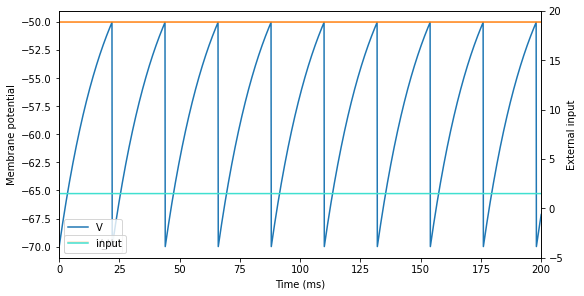

In [3]:
Iext, duration = bp.inputs.constant_input([(1.5, 200.)])
neu = bp.neurons.GIF(1)
run(neu, duration, Iext)

### Class 1 Excitability

  0%|          | 0/5000 [00:00<?, ?it/s]

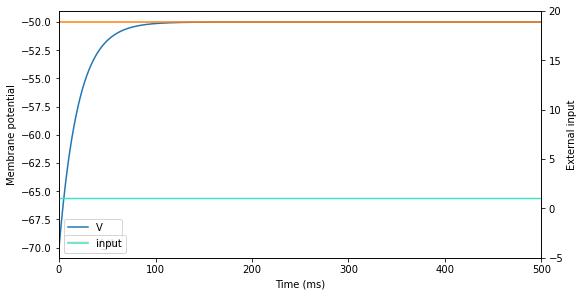

In [4]:
Iext, duration = bp.inputs.constant_input([(1. + 1e-6, 500.)])
neu = bp.neurons.GIF(1)
run(neu, duration, Iext)

### Spike Frequency Adaptation

  0%|          | 0/2000 [00:00<?, ?it/s]

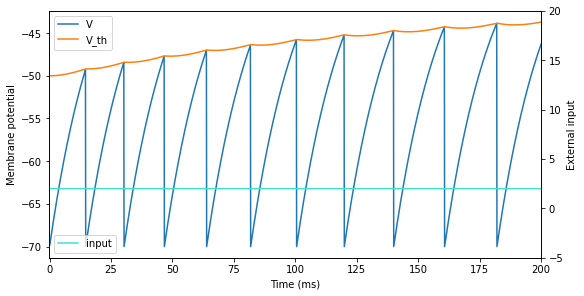

In [5]:
Iext, duration = bp.inputs.constant_input([(2., 200.)])
neu = bp.neurons.GIF(1, a=0.005)
run(neu, duration, Iext)

### Phasic Spiking

  0%|          | 0/5000 [00:00<?, ?it/s]

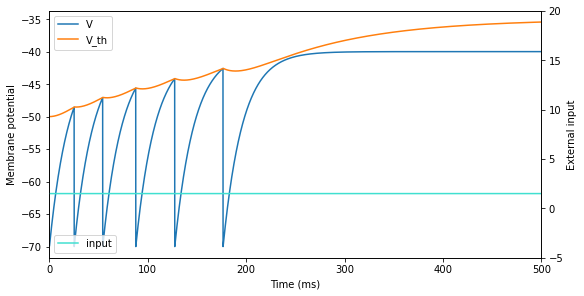

In [6]:
Iext, duration = bp.inputs.constant_input([(1.5, 500.)])
neu = bp.neurons.GIF(1, a=0.005)
run(neu, duration, Iext)

### Accomodation

  0%|          | 0/10000 [00:00<?, ?it/s]

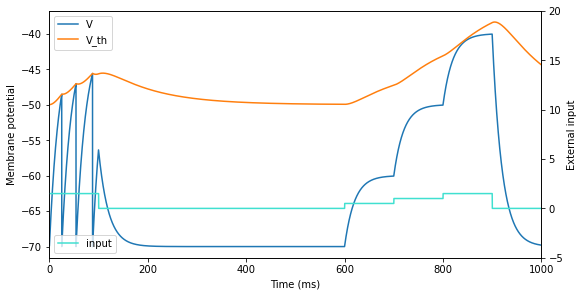

In [7]:
Iext, duration = bp.inputs.constant_input([(1.5, 100.),
                                           (0, 500.),
                                           (0.5, 100.),
                                           (1., 100.),
                                           (1.5, 100.),
                                           (0., 100.)])
neu = bp.neurons.GIF(1, a=0.005)
run(neu, duration, Iext)

### Threshold Variability

  0%|          | 0/4000 [00:00<?, ?it/s]

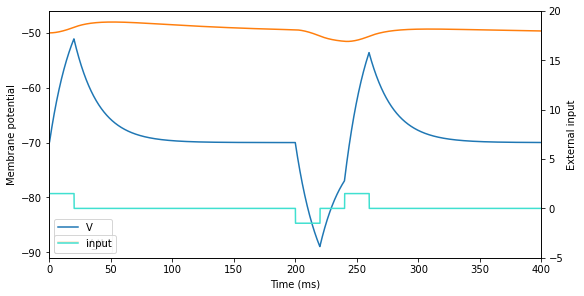

In [8]:
Iext, duration = bp.inputs.constant_input([(1.5, 20.),
                                           (0., 180.),
                                           (-1.5, 20.),
                                           (0., 20.),
                                           (1.5, 20.),
                                           (0., 140.)])
neu = bp.neurons.GIF(1, a=0.005)
run(neu, duration, Iext)

### Rebound Spiking

  0%|          | 0/10000 [00:00<?, ?it/s]

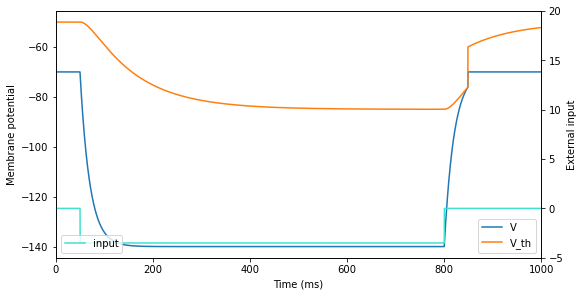

In [9]:
Iext, duration = bp.inputs.constant_input([(0, 50.), (-3.5, 750.), (0., 200.)])
neu = bp.neurons.GIF(1, a=0.005)
run(neu, duration, Iext)

### Class 2 Excitability

  0%|          | 0/2000 [00:00<?, ?it/s]

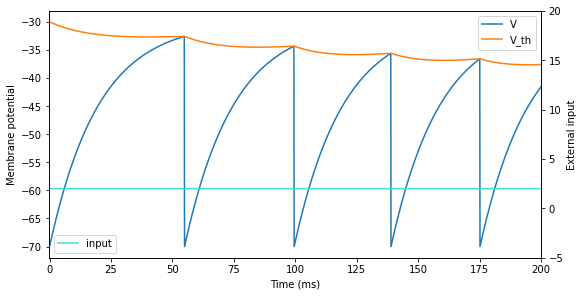

In [10]:
Iext, duration = bp.inputs.constant_input([(2 * (1. + 1e-6), 200.)])
neu = bp.neurons.GIF(1, a=0.005)
neu.V_th[:] = -30.
run(neu, duration, Iext)

### Integrator

  0%|          | 0/4000 [00:00<?, ?it/s]

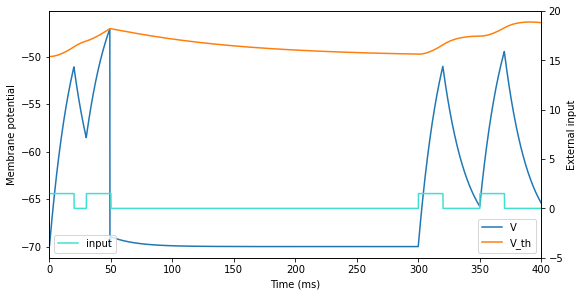

In [11]:
Iext, duration = bp.inputs.constant_input([(1.5, 20.),
                                           (0., 10.),
                                           (1.5, 20.),
                                           (0., 250.),
                                           (1.5, 20.),
                                           (0., 30.),
                                           (1.5, 20.),
                                           (0., 30.)])
neu = bp.neurons.GIF(1, a=0.005)
run(neu, duration, Iext)

### Input Bistability

  0%|          | 0/10000 [00:00<?, ?it/s]

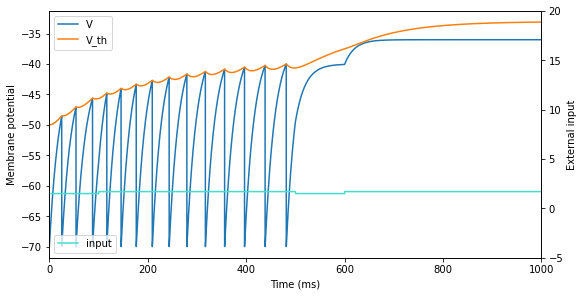

In [12]:
Iext, duration = bp.inputs.constant_input([(1.5, 100.),
                                           (1.7, 400.),
                                           (1.5, 100.),
                                           (1.7, 400.)])
neu = bp.neurons.GIF(1, a=0.005)
run(neu, duration, Iext)

### Hyperpolarization-induced Spiking

  0%|          | 0/4000 [00:00<?, ?it/s]

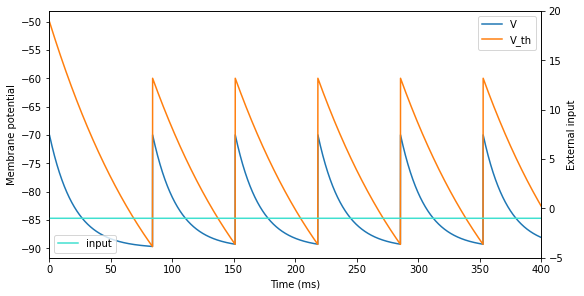

In [13]:
Iext, duration = bp.inputs.constant_input([(-1., 400.)])
neu = bp.neurons.GIF(1, V_th_reset=-60., V_th_inf=-120.)
neu.V_th[:] = -50.
run(neu, duration, Iext)

### Hyperpolarization-induced Bursting

  0%|          | 0/4000 [00:00<?, ?it/s]

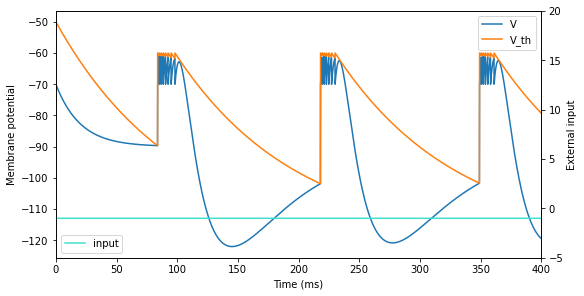

In [14]:
Iext, duration = bp.inputs.constant_input([(-1., 400.)])
neu = bp.neurons.GIF(1, V_th_reset=-60., V_th_inf=-120., A1=10.,
                 A2=-0.6)
neu.V_th[:] = -50.
run(neu, duration, Iext)

### Tonic Bursting

  0%|          | 0/5000 [00:00<?, ?it/s]

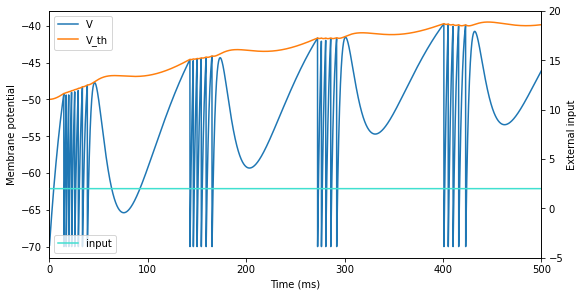

In [15]:
Iext, duration = bp.inputs.constant_input([(2., 500.)])
neu = bp.neurons.GIF(1, a=0.005, A1=10., A2=-0.6)
run(neu, duration, Iext)

### Phasic Bursting

  0%|          | 0/5000 [00:00<?, ?it/s]

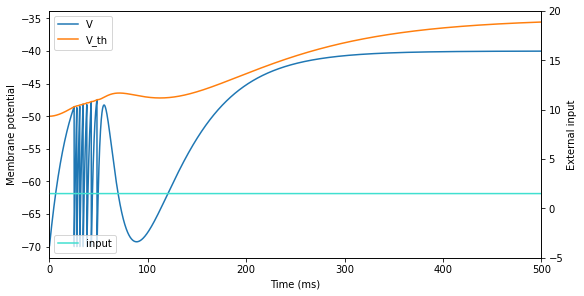

In [16]:
Iext, duration = bp.inputs.constant_input([(1.5, 500.)])
neu = bp.neurons.GIF(1, a=0.005, A1=10., A2=-0.6)
run(neu, duration, Iext)

### Rebound Bursting

  0%|          | 0/10000 [00:00<?, ?it/s]

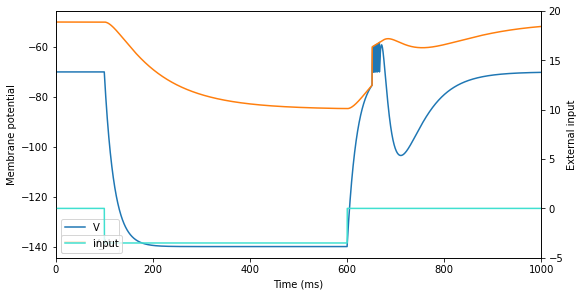

In [17]:
Iext, duration = bp.inputs.constant_input([(0, 100.), (-3.5, 500.), (0., 400.)])
neu = bp.neurons.GIF(1, a=0.005, A1=10., A2=-0.6)
run(neu, duration, Iext)

### Mixed Mode

  0%|          | 0/5000 [00:00<?, ?it/s]

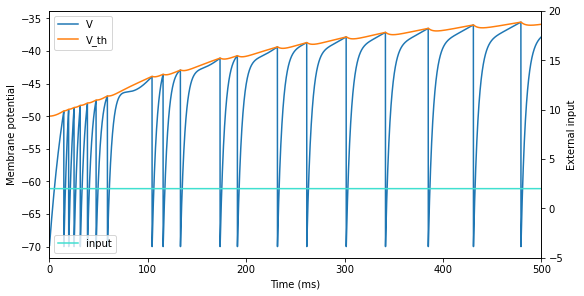

In [18]:
Iext, duration = bp.inputs.constant_input([(2., 500.)])
neu = bp.neurons.GIF(1, a=0.005, A1=5., A2=-0.3)
run(neu, duration, Iext)

### Afterpotentials

  0%|          | 0/2000 [00:00<?, ?it/s]

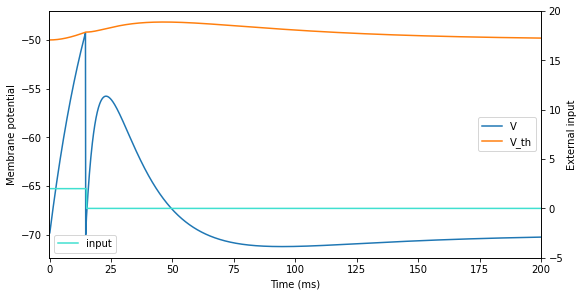

In [19]:
Iext, duration = bp.inputs.constant_input([(2., 15.), (0, 185.)])
neu = bp.neurons.GIF(1, a=0.005, A1=5., A2=-0.3)
run(neu, duration, Iext)

### Basal Bistability

  0%|          | 0/2000 [00:00<?, ?it/s]

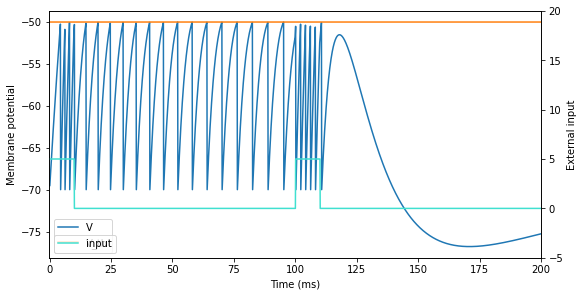

In [20]:
Iext, duration = bp.inputs.constant_input([(5., 10.), (0., 90.), (5., 10.), (0., 90.)])
neu = bp.neurons.GIF(1, A1=8., A2=-0.1)
run(neu, duration, Iext)

### Preferred Frequency

  0%|          | 0/8000 [00:00<?, ?it/s]

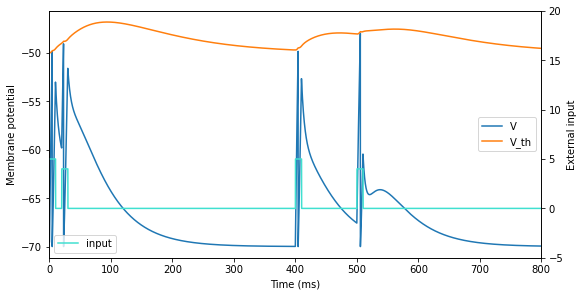

In [21]:
Iext, duration = bp.inputs.constant_input([(5., 10.),
                                           (0., 10.),
                                           (4., 10.),
                                           (0., 370.),
                                           (5., 10.),
                                           (0., 90.),
                                           (4., 10.),
                                           (0., 290.)])
neu = bp.neurons.GIF(1, a=0.005, A1=-3., A2=0.5)
run(neu, duration, Iext)

### Spike Latency

  0%|          | 0/500 [00:00<?, ?it/s]

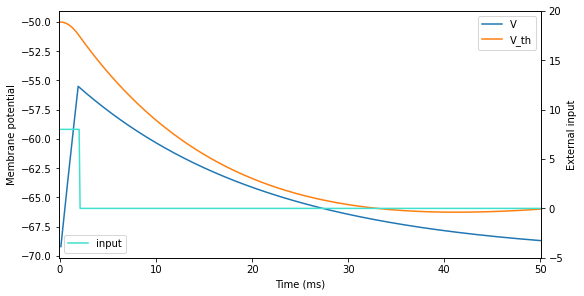

In [22]:
Iext, duration = bp.inputs.constant_input([(8., 2.), (0, 48.)])
neu = bp.neurons.GIF(1, a=-0.08)
run(neu, duration, Iext)